# ARIMA Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_sales=pd.read_csv('sales.csv')
df_sales.head()

,Month,Total_sale
0,1990-01,111
1,1990-02,120
2,1990-03,135
3,1990-04,130
4,1990-05,119


In [3]:
df_sales.isnull().sum()

Month         0
Total_sale    0
dtype: int64

In [4]:
df_sales.tail()

,Month,Total_sale
115,1999-08,505
116,1999-09,404
117,1999-10,359
118,1999-11,310
119,1999-12,337


In [5]:
#df_sales.dropna(axis=0,inplace=True)

In [6]:
df_sales.isnull().sum()

Month         0
Total_sale    0
dtype: int64

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       120 non-null    object
 1   Total_sale  120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [8]:
df_sales['Month']=pd.to_datetime(df_sales['Month'])

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       120 non-null    datetime64[ns]
 1   Total_sale  120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [10]:
df_sales.head()

,Month,Total_sale
0,1990-01-01,111
1,1990-02-01,120
2,1990-03-01,135
3,1990-04-01,130
4,1990-05-01,119


In [11]:
df_sales.set_index('Month',inplace=True)

In [12]:
df_sales.head()

,Total_sale
Month,
1990-01-01,111
1990-02-01,120
1990-03-01,135
1990-04-01,130
1990-05-01,119


<AxesSubplot:xlabel='Month'>

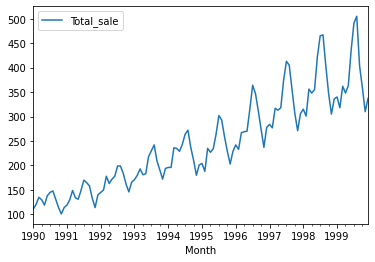

In [13]:
df_sales.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adf_test(series):
    result=adfuller(series)
    print('p- value: {}'.format(result[1]))
    
    if result[1] <= 0.05:
        print("reject the null hypothesis")
    else:
        print("accept the null hypothesis ")

In [16]:
adf_test(df_sales['Total_sale'])

p- value: 0.828551528462541
accept the null hypothesis 


In [17]:
## Use Techniques Differencing
df_sales['Total_sale First Difference']=df_sales['Total_sale']-df_sales['Total_sale'].shift(12)

In [18]:
df_sales.head()

,Total_sale,Total_sale First Difference
Month,,
1990-01-01,111,NaN
1990-02-01,120,NaN
1990-03-01,135,NaN
1990-04-01,130,NaN
1990-05-01,119,NaN


In [19]:
adf_test(df_sales['Total_sale First Difference'].dropna())

p- value: 0.008301292579774305
reject the null hypothesis


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

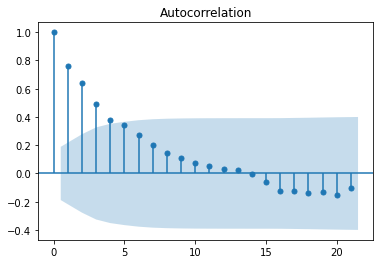

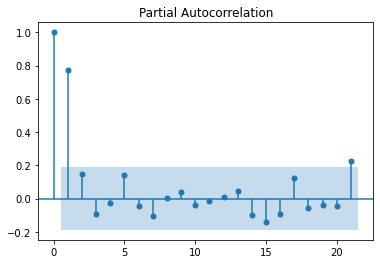

In [21]:
acf = plot_acf(df_sales["Total_sale First Difference"].dropna())
pacf = plot_pacf(df_sales["Total_sale First Difference"].dropna())

In [22]:
### split train and test data
df_sales

,Total_sale,Total_sale First Difference
Month,,
1990-01-01,111,NaN
1990-02-01,120,NaN
1990-03-01,135,NaN
1990-04-01,130,NaN
1990-05-01,119,NaN
...,...,...
1999-08-01,505,38.0
1999-09-01,404,0.0
1999-10-01,359,12.0


In [23]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1997,12,1)   # 1/1/1990 to 1/12/1997  (Training)
test_dataset_end=datetime(1999,12,1)    # 1/1/1998 to 1/12/1999  (Testing)

In [24]:
train_data=df_sales[:train_dataset_end]  #1/1/1990 to 1/12/1997

test_data=df_sales[train_dataset_end+timedelta(days=1):test_dataset_end]  # 1/1/1998 to 1/12/1999

In [25]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [26]:
pred_start_date

Timestamp('1998-01-01 00:00:00')

In [27]:
pred_end_date

Timestamp('1999-12-01 00:00:00')

In [28]:
test_data

,Total_sale,Total_sale First Difference
Month,,
1998-01-01,315,31.0
1998-02-01,301,24.0
1998-03-01,356,39.0
1998-04-01,348,35.0
1998-05-01,355,37.0
1998-06-01,422,48.0
1998-07-01,465,52.0
1998-08-01,467,62.0
1998-09-01,404,49.0


In [29]:
## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [30]:
train_data

,Total_sale,Total_sale First Difference
Month,,
1990-01-01,111,NaN
1990-02-01,120,NaN
1990-03-01,135,NaN
1990-04-01,130,NaN
1990-05-01,119,NaN
...,...,...
1997-08-01,405,58.0
1997-09-01,355,43.0
1997-10-01,306,32.0


In [31]:
model_ARIMA=ARIMA(train_data['Total_sale'],order=(14,2,12))  # (p=14(PACF),d,q(ACF))

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
test_data

,Total_sale,Total_sale First Difference
Month,,
1998-01-01,315,31.0
1998-02-01,301,24.0
1998-03-01,356,39.0
1998-04-01,348,35.0
1998-05-01,355,37.0
1998-06-01,422,48.0
1998-07-01,465,52.0
1998-08-01,467,62.0
1998-09-01,404,49.0


In [34]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1998-01-01 00:00:00
1999-12-01 00:00:00


In [35]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Total_sale']-pred

In [36]:
pred

1998-01-01    312.887751
1998-02-01    298.893566
1998-03-01    329.759171
1998-04-01    330.044082
1998-05-01    339.416786
1998-06-01    401.562621
1998-07-01    444.942223
1998-08-01    435.485052
1998-09-01    391.963093
1998-10-01    342.964218
1998-11-01    313.519824
1998-12-01    345.049431
1999-01-01    350.365763
1999-02-01    334.812832
1999-03-01    362.777059
1999-04-01    365.672495
1999-05-01    377.683363
1999-06-01    436.608112
1999-07-01    480.418529
1999-08-01    466.887216
1999-09-01    429.254257
1999-10-01    380.587912
1999-11-01    355.591687
1999-12-01    384.346572
Freq: MS, dtype: float64

In [37]:
residuals

Month
1998-01-01     2.112249
1998-02-01     2.106434
1998-03-01    26.240829
1998-04-01    17.955918
1998-05-01    15.583214
1998-06-01    20.437379
1998-07-01    20.057777
1998-08-01    31.514948
1998-09-01    12.036907
1998-10-01     4.035782
1998-11-01    -8.519824
1998-12-01    -9.049431
1999-01-01   -10.365763
1999-02-01   -16.812832
1999-03-01    -0.777059
1999-04-01   -17.672495
1999-05-01   -14.683363
1999-06-01    -1.608112
1999-07-01    10.581471
1999-08-01    38.112784
1999-09-01   -25.254257
1999-10-01   -21.587912
1999-11-01   -45.591687
1999-12-01   -47.346572
dtype: float64

In [38]:
residuals.mean()

-0.7705673361582891

<AxesSubplot:xlabel='Month'>

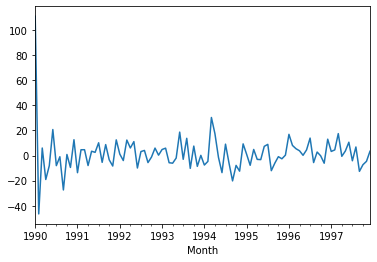

In [39]:
model_Arima_fit.resid.plot()

In [40]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

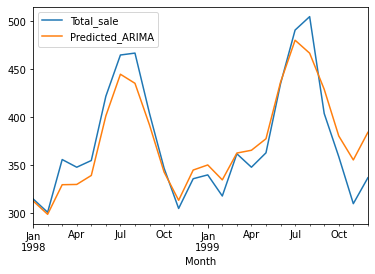

In [41]:
test_data[['Total_sale','Predicted_ARIMA']].plot()

In [42]:
df_sales.head()

,Total_sale,Total_sale First Difference
Month,,
1990-01-01,111,NaN
1990-02-01,120,NaN
1990-03-01,135,NaN
1990-04-01,130,NaN
1990-05-01,119,NaN


In [43]:
df_sales.tail()

,Total_sale,Total_sale First Difference
Month,,
1999-08-01,505,38.0
1999-09-01,404,0.0
1999-10-01,359,12.0
1999-11-01,310,5.0
1999-12-01,337,1.0


In [44]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_sales.index[-1]+ DateOffset(months=x)for x in range(0,13)]

In [45]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_sales.columns)

In [46]:
future_datest_df.head()

,Total_sale,Total_sale First Difference
2000-01-01,NaN,NaN
2000-02-01,NaN,NaN
2000-03-01,NaN,NaN
2000-04-01,NaN,NaN
2000-05-01,NaN,NaN


In [47]:
future_datest_df.tail()

,Total_sale,Total_sale First Difference
2000-08-01,NaN,NaN
2000-09-01,NaN,NaN
2000-10-01,NaN,NaN
2000-11-01,NaN,NaN
2000-12-01,NaN,NaN


In [49]:
future_df=pd.concat([df_sales,future_datest_df])

In [50]:
future_df

,Total_sale,Total_sale First Difference
1990-01-01,111,NaN
1990-02-01,120,NaN
1990-03-01,135,NaN
1990-04-01,130,NaN
1990-05-01,119,NaN
...,...,...
2000-08-01,NaN,NaN
2000-09-01,NaN,NaN
2000-10-01,NaN,NaN
2000-11-01,NaN,NaN


<AxesSubplot:>

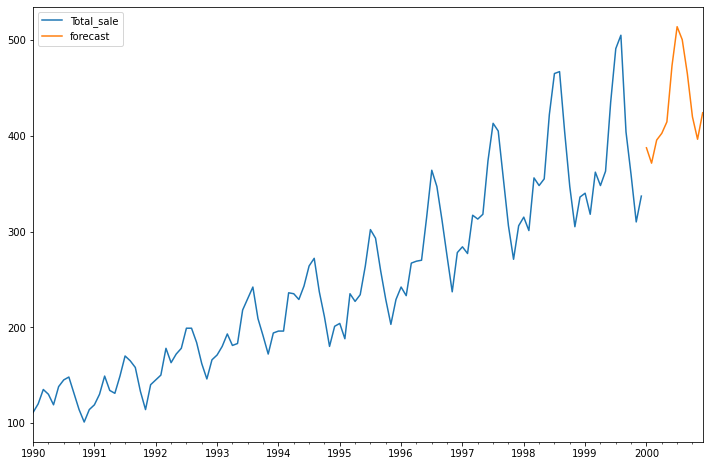

In [51]:
future_df['forecast']=model_Arima_fit.predict(start='2000-01-01',end='2000-12-01')
future_df[['Total_sale', 'forecast']].plot(figsize=(12, 8)) 

In [52]:
future_df[['Total_sale', 'forecast']].tail(12)

,Total_sale,forecast
2000-01-01,NaN,387.432163
2000-02-01,NaN,371.391879
2000-03-01,NaN,395.519120
2000-04-01,NaN,402.540907
2000-05-01,NaN,414.524004
2000-06-01,NaN,473.212369
2000-07-01,NaN,513.934136
2000-08-01,NaN,500.377997
2000-09-01,NaN,464.869874
2000-10-01,NaN,419.748075
